In [212]:
# 디렉토리 설정
import os

os.chdir('C:\\Users\\rbden\\OneDrive\\바탕 화면\\Univ\\R & Python\\Python\\Pythondata')

os.getcwd()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
train = pd.read_csv('credit_train.csv')

train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2,-6,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3,-5,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2,-22,2
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2,-37,0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2,-26,2


In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  int64  
 18  begin_

# A. 데이터 내 EDA

## 1) 변수별 비율 확인

In [215]:
print('남성 비율 : ' , round(len(train[train['gender'] == 'M']) / len(train) , 3)*100 , '%')
print('여성 비율 : ' , round(len(train[train['gender'] == 'F']) / len(train) , 3)*100 , '%')
print('\n')
print('자동차 소유주 비율 : ' , round(len(train[train['car'] == 'Y']) / len(train) , 3)*100 , '%')
print('\n')
print('부동산 소유주 비율 : ' , round(len(train[train['reality'] == 'Y']) / len(train) , 3)*100 , '%')
print('\n')
print('자녀 수')
print('부부 가구 비율 : ' , round(len(train[train['child_num'] == 0]) / len(train) , 3)*100 , '%')
print('자녀 1명 비율 : ' , round(len(train[train['child_num'] == 1]) / len(train) , 3)*100 , '%')
print('자녀 2명 비율 : ' , round(len(train[train['child_num'] == 2]) / len(train) , 3)*100 , '%')
print('다자녀 비율 : ' , 
      100 - round(len(train[train['child_num'] == 0]) / len(train) , 3)*100 -\
      round(len(train[train['child_num'] == 1]) / len(train) , 3)*100 -\
      round(len(train[train['child_num'] == 2]) / len(train) , 3)*100, '%')
print('\n')
print('수입 구분')
print('Commercial associate 비율 : ' , round(len(train[train['income_type'] == 'Commercial associate']) / len(train) , 3)*100 , '%')
print('직장인 비율 : ' , round(len(train[train['income_type'] == 'Working']) / len(train) , 3)*100 , '%')
print('공무원 비율 : ' , round(len(train[train['income_type'] == 'State servant']) / len(train) , 3)*100 , '%')
print('연금 수령자 비율 : ' , round(len(train[train['income_type'] == 'Pensioner']) / len(train) , 3)*100 , '%')
print('학생 비율 : ' , round(len(train[train['income_type'] == 'Student']) / len(train) , 4)*100 , '%')
print('\n')
print('교육 구분')
print('고졸 비율 : ' , round(len(train[train['edu_type'] == 'Higher education']) / len(train) , 3)*100 , '%')
print('중졸 비율 : ' , round(len(train[train['edu_type'] == 'Secondary / secondary special']) / len(train) , 3)*100 , '%')
print('고등학교 중퇴 비율 : ' , round(len(train[train['edu_type'] == 'Incomplete higher']) / len(train) , 3)*100 , '%')
print('초졸 비율 : ' , round(len(train[train['edu_type'] == 'Lower secondary']) / len(train) , 3)*100 , '%')
print('대졸 비율 : ' , round(len(train[train['edu_type'] == 'Academic degree']) / len(train) , 3)*100 , '%')
print('\n')
print('결혼 구분')
print('결혼 비율 : ' , round(len(train[train['family_type'] == 'Married']) / len(train) , 3)*100 , '%')
print('법률혼 비율 : ' , round(len(train[train['family_type'] == 'Civil marriage']) / len(train) , 3)*100 , '%')
print('이혼 비율 : ' , round(len(train[train['family_type'] == 'Seperated']) / len(train) , 3)*100 , '%')
print('미혼 비율 : ' , round(len(train[train['family_type'] == 'Single / not married']) / len(train) , 3)*100 , '%')
print('배우자 사망 비율 : ' , round(len(train[train['family_type'] == 'Widow']) / len(train) , 3)*100 , '%')
print('\n')
print('주거 구분')
print('시립 아파트 비율 : ' , round(len(train[train['house_type'] == 'Municipal apartment']) / len(train) , 3)*100 , '%')
print('아파트 비율 : ' , round(len(train[train['house_type'] == 'House / apartment']) / len(train) , 3)*100 , '%')
print('부모와 함께 거주 비율 : ' , round(len(train[train['house_type'] == 'With parents']) / len(train) , 3)*100 , '%')
print('세입자 비율 : ' , round(len(train[train['house_type'] == 'Co-op apartment']) / len(train) , 3)*100 , '%')
print('임대 비율 : ' , round(len(train[train['house_type'] == 'Rented apartment']) / len(train) , 3)*100 , '%')
print('오피스텔 비율 : ' , round(len(train[train['house_type'] == 'Office apartment']) / len(train) , 3)*100 , '%')
print('\n')
print('핸드폰 소유 비율 : ' , round(len(train[train['FLAG_MOBIL'] == 1]) / len(train) , 3)*100 , '%')
print('\n')
print('업무용 핸드폰 소유 비율 : ' , round(len(train[train['work_phone'] == 1]) / len(train) , 3)*100 , '%')
print('\n')
print('전화 소유 비율 : ' , round(len(train[train['phone'] == 1]) / len(train) , 3)*100 , '%')
print('\n')
print('이메일 소유 비율 : ' , round(len(train[train['email'] == 1]) / len(train) , 3)*100 , '%')
print('\n')
print('가구 구분')
print('1인 가구 비율 : ' , round(len(train[train['family_size'] == 1]) / len(train) , 3)*100 , '%')
print('2인 가구 비율 : ' , round(len(train[train['family_size'] == 2]) / len(train) , 3)*100 , '%')
print('3인 가구 비율 : ' , round(len(train[train['family_size'] == 3]) / len(train) , 3)*100 , '%')
print('4인 가구 비율 : ' , round(len(train[train['family_size'] == 4]) / len(train) , 3)*100 , '%')
print('5인 가구 비율 : ' , round(len(train[train['family_size'] == 5]) / len(train) , 3)*100 , '%')
print('6인 가구 비율 : ' , round(len(train[train['family_size'] == 6]) / len(train) , 3)*100 , '%')
print('\n')
print('신용도 구분')
print('신용도 좋음 비율 : ' , round(len(train[train['credit'] == 0]) / len(train) , 3)*100 , '%')
print('신용도 중간 비율 : ' , round(len(train[train['credit'] == 1]) / len(train) , 3)*100 , '%')
print('신용도 나쁨 비율 : ' , round(len(train[train['credit'] == 2]) / len(train) , 3)*100 , '%')

남성 비율 :  33.1 %
여성 비율 :  66.9 %


자동차 소유주 비율 :  38.0 %


부동산 소유주 비율 :  67.4 %


자녀 수
부부 가구 비율 :  69.3 %
자녀 1명 비율 :  20.4 %
자녀 2명 비율 :  8.9 %
다자녀 비율 :  1.400000000000004 %


수입 구분
Commercial associate 비율 :  23.400000000000002 %
직장인 비율 :  51.6 %
공무원 비율 :  8.1 %
연금 수령자 비율 :  16.8 %
학생 비율 :  0.03 %


교육 구분
고졸 비율 :  27.1 %
중졸 비율 :  68.0 %
고등학교 중퇴 비율 :  3.9 %
초졸 비율 :  1.0 %
대졸 비율 :  0.1 %


결혼 구분
결혼 비율 :  68.8 %
법률혼 비율 :  8.0 %
이혼 비율 :  0.0 %
미혼 비율 :  13.200000000000001 %
배우자 사망 비율 :  4.2 %


주거 구분
시립 아파트 비율 :  3.1 %
아파트 비율 :  89.4 %
부모와 함께 거주 비율 :  4.8 %
세입자 비율 :  0.4 %
임대 비율 :  1.6 %
오피스텔 비율 :  0.7000000000000001 %


핸드폰 소유 비율 :  100.0 %


업무용 핸드폰 소유 비율 :  22.5 %


전화 소유 비율 :  29.4 %


이메일 소유 비율 :  9.1 %


가구 구분
1인 가구 비율 :  19.3 %
2인 가구 비율 :  53.300000000000004 %
3인 가구 비율 :  17.5 %
4인 가구 비율 :  8.5 %
5인 가구 비율 :  1.0999999999999999 %
6인 가구 비율 :  0.2 %


신용도 구분
신용도 좋음 비율 :  12.2 %
신용도 중간 비율 :  23.7 %
신용도 나쁨 비율 :  64.1 %


## 2) 직업 변수

### (1) 직업별 count 확인

In [216]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [217]:
occyp_type = train.groupby('occyp_type').index.count()

occyp_type

occyp_type
Accountants               902
Cleaning staff            403
Cooking staff             457
Core staff               2646
Drivers                  1575
HR staff                   62
High skill tech staff    1040
IT staff                   41
Laborers                 4512
Low-skill Laborers        127
Managers                 2167
Medicine staff            864
Private service staff     243
Realty agents              63
Sales staff              2539
Secretaries                97
Security staff            424
Waiters/barmen staff      124
Name: index, dtype: int64

In [218]:
occyp_type_1 = occyp_type[:9]
occyp_type_2 = occyp_type[9:]

<BarContainer object of 9 artists>

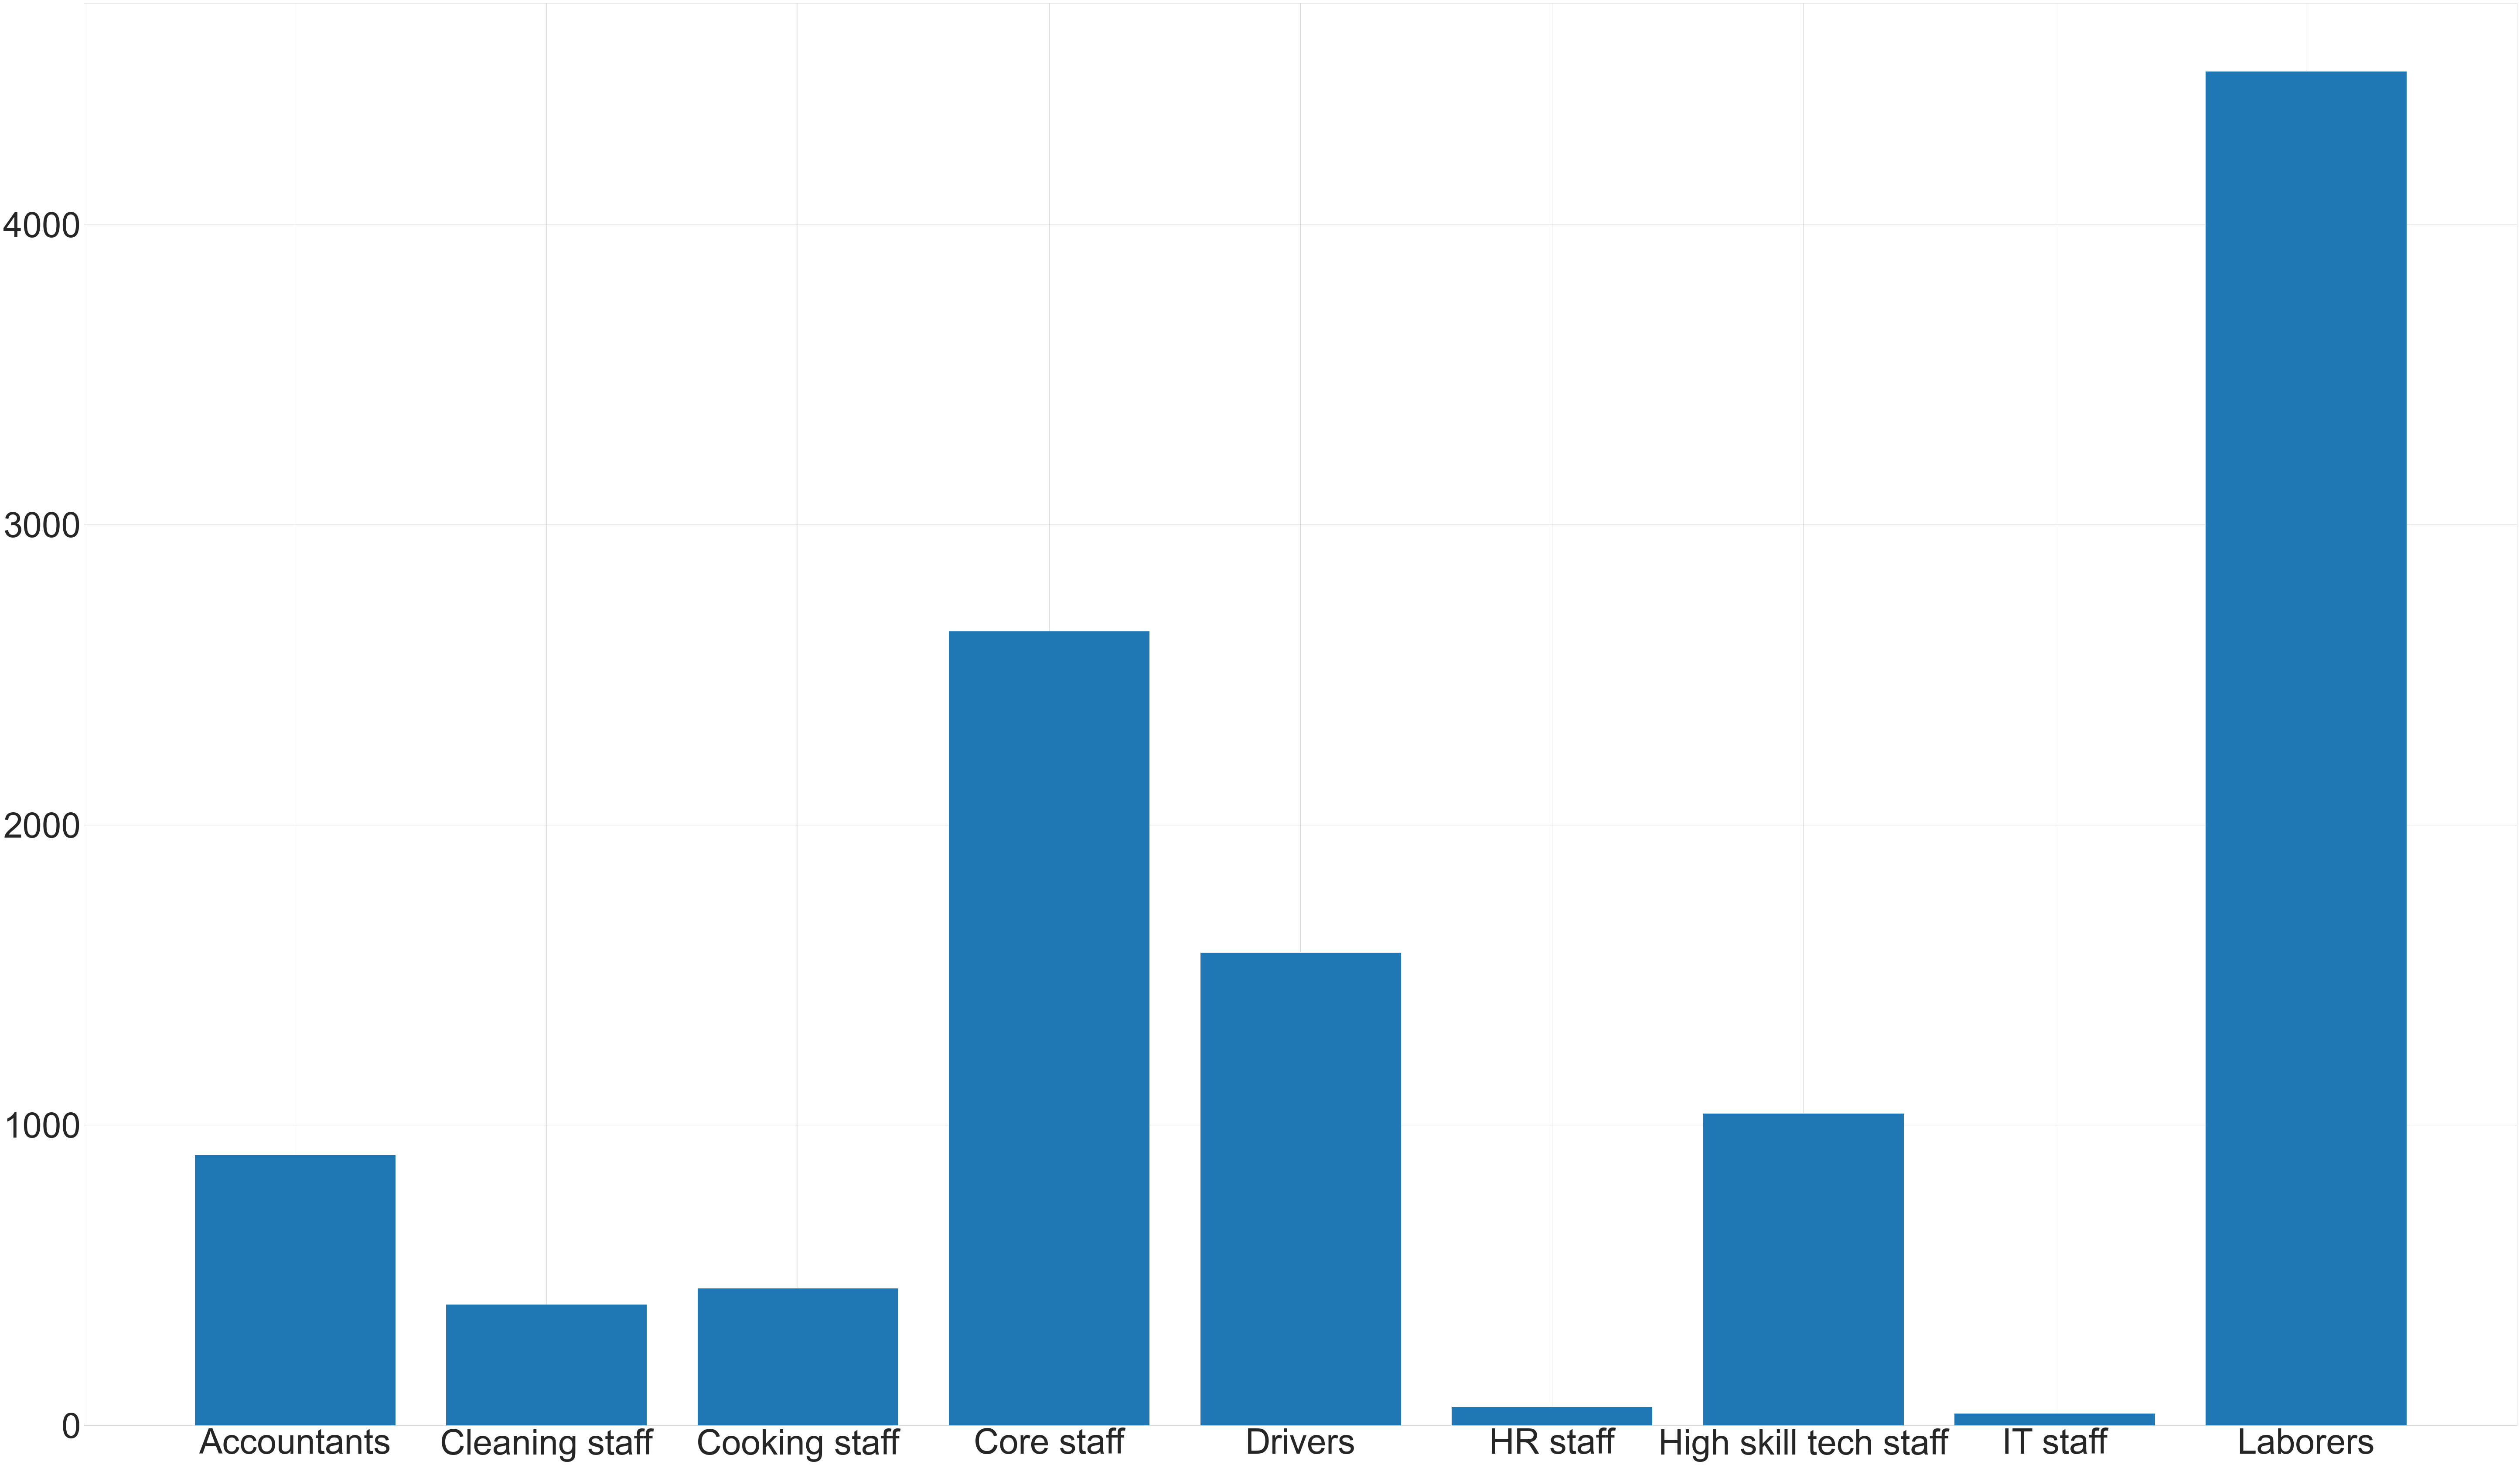

In [219]:
plt.rcParams['figure.figsize'] = [100, 60]
plt.rc('font', size = 80)
plt.bar(occyp_type_1.index , occyp_type_1)

<BarContainer object of 9 artists>

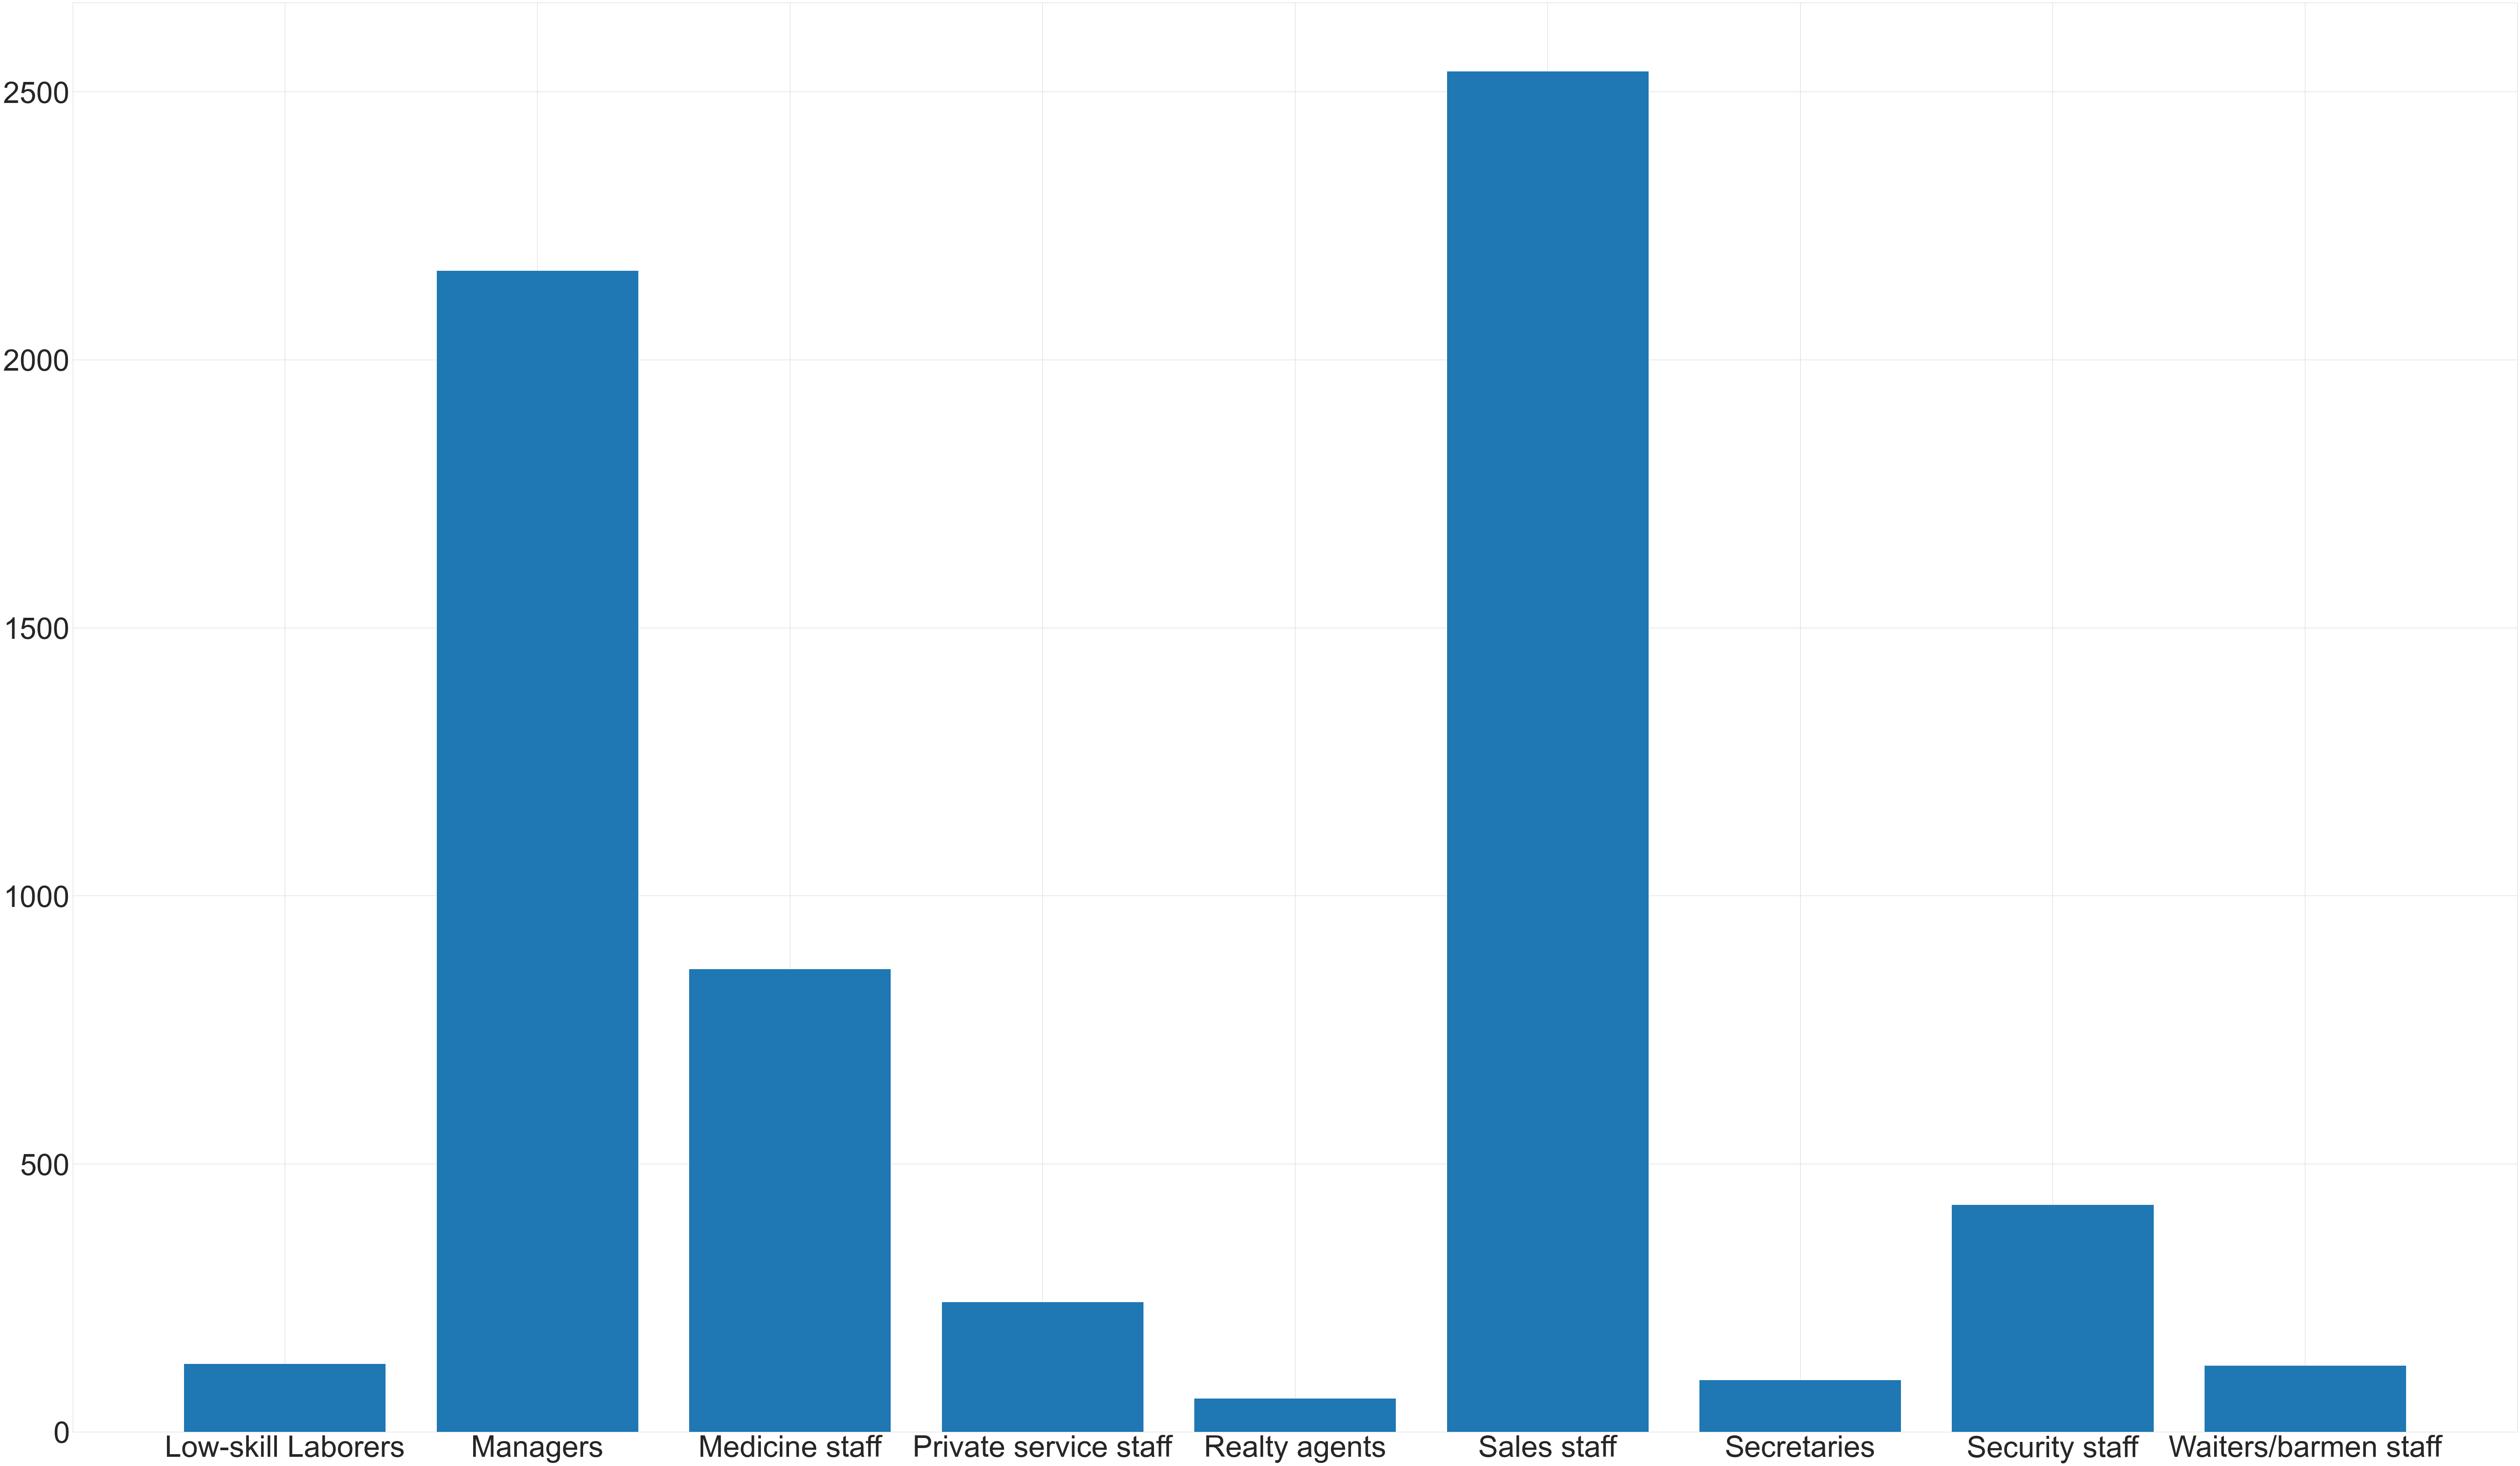

In [220]:
plt.rcParams['figure.figsize'] = [100, 60]
plt.rc('font', size = 68)
plt.bar(occyp_type_2.index , occyp_type_2)

### (2) 직업 변수 결측치 처리 

In [221]:
occyp_na = train[train['occyp_type'].isna()]

occyp_na

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2,-6,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3,-38,2
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1,-41,2
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2,-37,2
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2,-7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2,-57,2
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1,-43,2
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1,-21,1
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2,-2,1


#### (a) 고용안됨

In [222]:
no_occyp = occyp_na[occyp_na['DAYS_EMPLOYED'] == 365243]

no_occyp

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1,-41,2
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2,-37,2
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2,-7,2
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1,-5,2
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1,-24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1,-60,1
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2,-17,1
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2,-57,2
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1,-43,2


In [223]:
train.loc[no_occyp.index , 'occyp_type'] = 'Retirement'
train.loc[no_occyp.index , 'DAYS_EMPLOYED'] = 0

train.iloc[no_occyp.index]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,0,1,0,1,0,Retirement,1,-41,2
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,0,1,0,0,0,Retirement,2,-37,2
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,0,1,0,1,0,Retirement,2,-7,2
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,0,1,0,1,0,Retirement,1,-5,2
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,0,1,0,1,0,Retirement,1,-24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,0,1,0,0,1,Retirement,1,-60,1
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,0,1,0,1,0,Retirement,2,-17,1
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,0,1,0,0,0,Retirement,2,-57,2
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,0,1,0,0,0,Retirement,1,-43,2


In [224]:
no_occyp['income_type'].unique()

array(['Pensioner'], dtype=object)

#### (b) 응답 없음

In [225]:
no_reply = occyp_na[occyp_na['DAYS_EMPLOYED'] != 365243]

no_reply

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2,-6,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3,-38,2
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2,-7,2
20,20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,1,0,1,0,NaN,2,-35,2
23,23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-14542,-444,1,1,1,1,NaN,2,-18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26433,26433,F,Y,N,0,121500.0,State servant,Higher education,Married,House / apartment,-19912,-4973,1,0,1,0,NaN,2,-31,2
26435,26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,-19691,-473,1,0,0,0,NaN,2,-40,2
26437,26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13015,-3647,1,0,0,0,NaN,2,-13,2
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2,-2,1


#### (b) - 1 응답 없음의 소득 분위수 확인

C:\Users\rbden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income_total', ylabel='Density'>

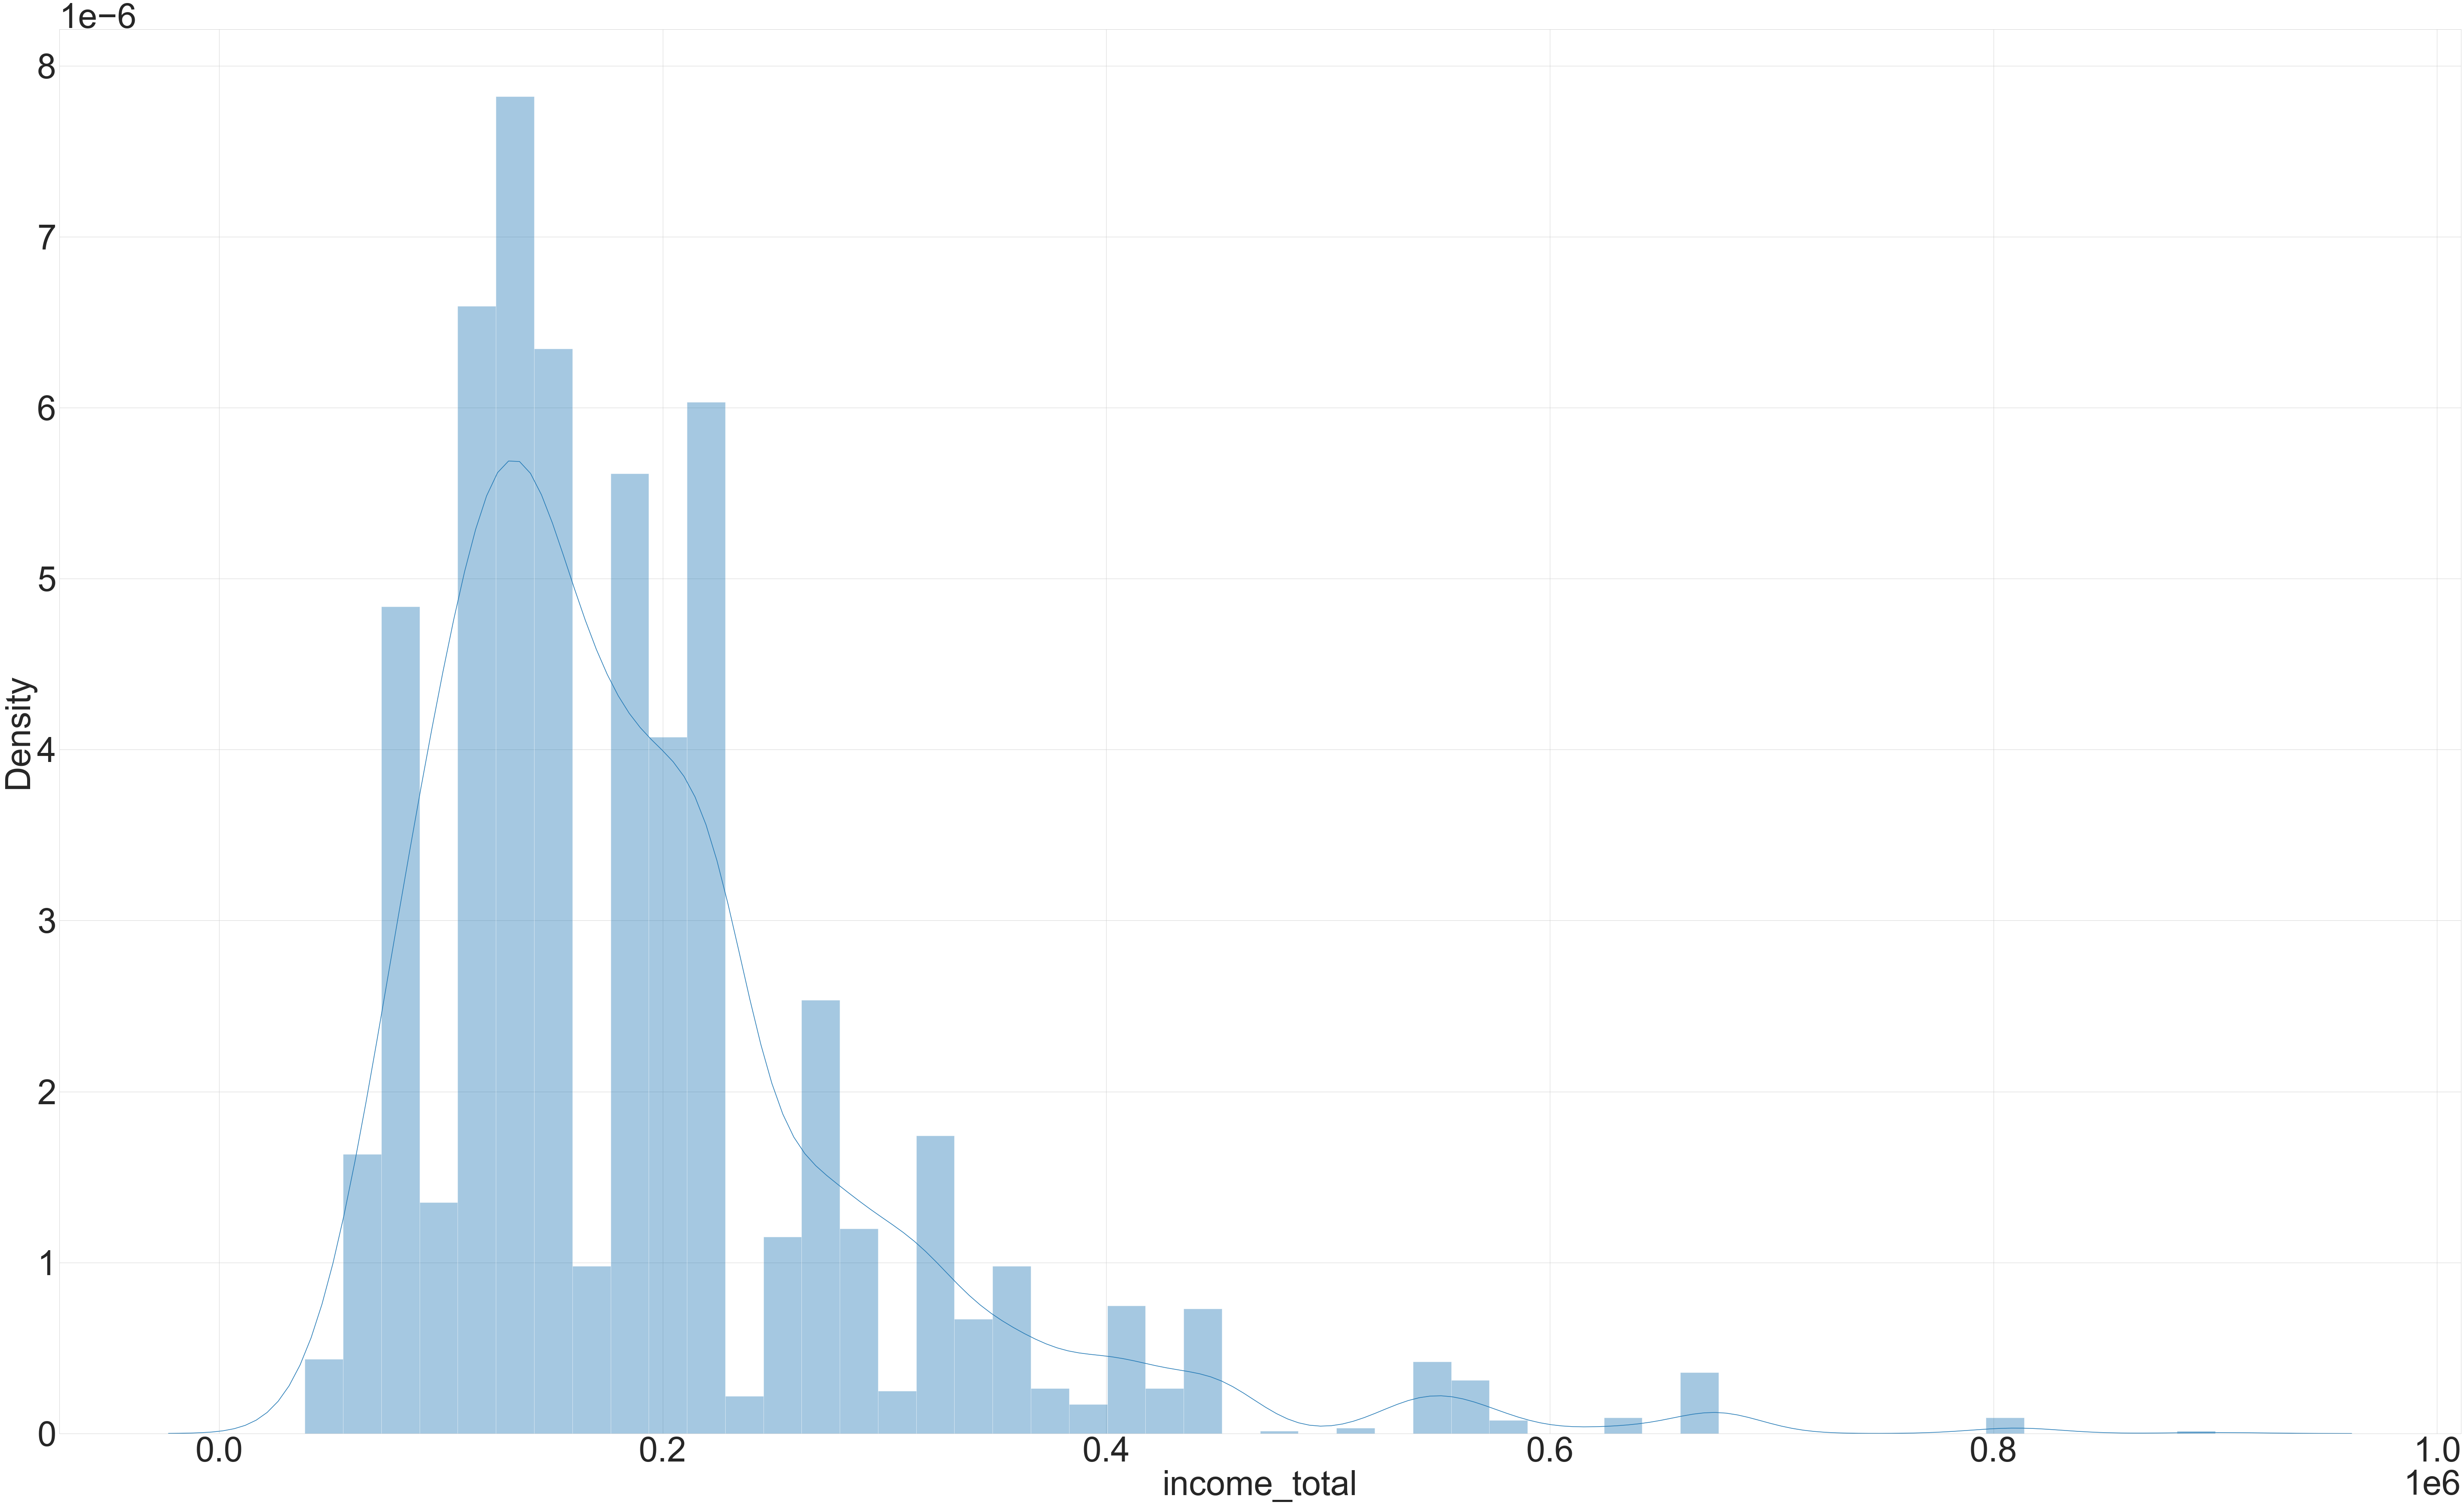

In [43]:
sns.distplot(no_reply['income_total'])

In [50]:
Q_1 = no_reply['income_total'].quantile(.25)
Q_2 = no_reply['income_total'].quantile(.50)
Q_3 = no_reply['income_total'].quantile(.75)

print('소득 제 1사분위수 : ' , Q_1)
print('소득 제 2사분위수 : ' , Q_2)
print('소득 제 3사분위수 : ' , Q_3)

소득 제 1사분위수 :  121500.0
소득 제 2사분위수 :  162000.0
소득 제 3사분위수 :  225000.0


In [53]:
len(no_reply['income_total'].unique())

95

#### (b) - 2 응답 없음의 income_type 확인 

In [57]:
no_reply['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Student',
       'Pensioner'], dtype=object)

In [226]:
Pensioner_etc = no_reply[no_reply['income_type'] == 'Pensioner']

Pensioner_etc

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
6743,6743,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,NaN,2,-36,2
15682,15682,F,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20352,-673,1,0,1,0,NaN,2,-20,2


In [227]:
train.loc[Pensioner_etc.index , 'occyp_type'] = 'Pensioner_etc'

train.iloc[Pensioner_etc.index]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
6743,6743,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,Pensioner_etc,2,-36,2
15682,15682,F,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20352,-673,1,0,1,0,Pensioner_etc,2,-20,2


In [228]:
Student_etc = no_reply[no_reply['income_type'] == 'Student']

Student_etc

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
6223,6223,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,NaN,1,-14,2


In [229]:
train.loc[Student_etc.index , 'occyp_type'] = 'Student_etc'

train.iloc[Student_etc.index]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
6223,6223,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,Student_etc,1,-14,2


In [230]:
Commercial_associate_etc = no_reply[no_reply['income_type'] == 'Commercial associate']

Commercial_associate_etc

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2,-6,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3,-38,2
49,49,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18858,-2010,1,0,1,0,NaN,2,-12,2
72,72,F,N,N,0,351000.0,Commercial associate,Higher education,Married,House / apartment,-21574,-1081,1,0,1,0,NaN,2,-4,2
76,76,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,NaN,2,-15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26352,26352,F,N,Y,0,189000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20233,-6218,1,1,1,0,NaN,2,-36,2
26379,26379,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-21188,-5818,1,0,0,0,NaN,2,-20,2
26383,26383,F,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19791,-3172,1,0,1,0,NaN,1,-19,1
26419,26419,M,N,N,1,315000.0,Commercial associate,Higher education,Married,House / apartment,-18321,-110,1,0,1,0,NaN,3,-28,2


In [231]:
train.loc[Commercial_associate_etc.index , 'occyp_type'] = 'Commercial_associate_etc'

train.iloc[Commercial_associate_etc.index]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,Commercial_associate_etc,2,-6,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,Commercial_associate_etc,3,-38,2
49,49,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18858,-2010,1,0,1,0,Commercial_associate_etc,2,-12,2
72,72,F,N,N,0,351000.0,Commercial associate,Higher education,Married,House / apartment,-21574,-1081,1,0,1,0,Commercial_associate_etc,2,-4,2
76,76,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,Commercial_associate_etc,2,-15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26352,26352,F,N,Y,0,189000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20233,-6218,1,1,1,0,Commercial_associate_etc,2,-36,2
26379,26379,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-21188,-5818,1,0,0,0,Commercial_associate_etc,2,-20,2
26383,26383,F,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19791,-3172,1,0,1,0,Commercial_associate_etc,1,-19,1
26419,26419,M,N,N,1,315000.0,Commercial associate,Higher education,Married,House / apartment,-18321,-110,1,0,1,0,Commercial_associate_etc,3,-28,2


In [232]:
Working_etc = no_reply[no_reply['income_type'] == 'Working']

Working_etc

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2,-7,2
20,20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,1,0,1,0,NaN,2,-35,2
23,23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-14542,-444,1,1,1,1,NaN,2,-18,2
54,54,F,N,N,1,99000.0,Working,Secondary / secondary special,Married,House / apartment,-15626,-422,1,0,0,0,NaN,3,-2,1
106,106,F,N,N,1,90000.0,Working,Secondary / secondary special,Married,House / apartment,-16118,-1959,1,0,1,0,NaN,3,-47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26430,26430,F,N,Y,0,112500.0,Working,Incomplete higher,Civil marriage,House / apartment,-9301,-1751,1,0,0,0,NaN,2,-19,2
26435,26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,-19691,-473,1,0,0,0,NaN,2,-40,2
26437,26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13015,-3647,1,0,0,0,NaN,2,-13,2
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2,-2,1


In [233]:
train.loc[Working_etc.index , 'occyp_type'] = 'Working_etc'

train.iloc[Working_etc.index]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,Working_etc,2,-7,2
20,20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,1,0,1,0,Working_etc,2,-35,2
23,23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-14542,-444,1,1,1,1,Working_etc,2,-18,2
54,54,F,N,N,1,99000.0,Working,Secondary / secondary special,Married,House / apartment,-15626,-422,1,0,0,0,Working_etc,3,-2,1
106,106,F,N,N,1,90000.0,Working,Secondary / secondary special,Married,House / apartment,-16118,-1959,1,0,1,0,Working_etc,3,-47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26430,26430,F,N,Y,0,112500.0,Working,Incomplete higher,Civil marriage,House / apartment,-9301,-1751,1,0,0,0,Working_etc,2,-19,2
26435,26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,-19691,-473,1,0,0,0,Working_etc,2,-40,2
26437,26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13015,-3647,1,0,0,0,Working_etc,2,-13,2
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,Working_etc,2,-2,1


In [234]:
State_servant_etc = no_reply[no_reply['income_type'] == 'State servant']

State_servant_etc

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
27,27,M,Y,Y,0,405000.0,State servant,Secondary / secondary special,Married,House / apartment,-17309,-3500,1,0,0,0,NaN,2,-57,2
165,165,F,N,Y,0,139500.0,State servant,Higher education,Married,House / apartment,-21017,-895,1,1,1,0,NaN,2,-4,1
237,237,F,N,N,0,112500.0,State servant,Secondary / secondary special,Married,House / apartment,-14216,-6649,1,1,1,0,NaN,2,-27,2
240,240,M,Y,N,0,382500.0,State servant,Higher education,Married,Office apartment,-11960,-4174,1,0,0,0,NaN,2,-3,1
275,275,M,Y,N,1,337500.0,State servant,Higher education,Married,House / apartment,-12794,-3574,1,0,0,0,NaN,3,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,F,N,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-9313,-615,1,0,0,0,NaN,2,-10,2
26067,26067,F,N,Y,0,90000.0,State servant,Secondary / secondary special,Separated,House / apartment,-14271,-302,1,0,0,0,NaN,1,-37,2
26153,26153,F,N,Y,0,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-16127,-8497,1,0,1,0,NaN,2,-31,2
26306,26306,M,N,N,1,292500.0,State servant,Secondary / secondary special,Married,House / apartment,-15437,-7835,1,0,1,0,NaN,3,-27,2


In [235]:
train.loc[State_servant_etc.index , 'occyp_type'] = 'State_servant_etc'

train.iloc[State_servant_etc.index]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
27,27,M,Y,Y,0,405000.0,State servant,Secondary / secondary special,Married,House / apartment,-17309,-3500,1,0,0,0,State_servant_etc,2,-57,2
165,165,F,N,Y,0,139500.0,State servant,Higher education,Married,House / apartment,-21017,-895,1,1,1,0,State_servant_etc,2,-4,1
237,237,F,N,N,0,112500.0,State servant,Secondary / secondary special,Married,House / apartment,-14216,-6649,1,1,1,0,State_servant_etc,2,-27,2
240,240,M,Y,N,0,382500.0,State servant,Higher education,Married,Office apartment,-11960,-4174,1,0,0,0,State_servant_etc,2,-3,1
275,275,M,Y,N,1,337500.0,State servant,Higher education,Married,House / apartment,-12794,-3574,1,0,0,0,State_servant_etc,3,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,F,N,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-9313,-615,1,0,0,0,State_servant_etc,2,-10,2
26067,26067,F,N,Y,0,90000.0,State servant,Secondary / secondary special,Separated,House / apartment,-14271,-302,1,0,0,0,State_servant_etc,1,-37,2
26153,26153,F,N,Y,0,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-16127,-8497,1,0,1,0,State_servant_etc,2,-31,2
26306,26306,M,N,N,1,292500.0,State servant,Secondary / secondary special,Married,House / apartment,-15437,-7835,1,0,1,0,State_servant_etc,3,-27,2


In [236]:
train['occyp_type'].unique()

array(['Commercial_associate_etc', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Retirement', 'Working_etc', 'Realty agents',
       'State_servant_etc', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff', 'Student_etc', 'Pensioner_etc'],
      dtype=object)

In [238]:
sum(train['occyp_type'].isna())

0

## 3) 동일 인물 확인

### (1) 동일 인물 구분

In [239]:
# 성별, 연간 소득, 소득 분류, 출생일, 업무 시작일의 변수를 하나로 만들어 줌 (추후 동일 인물 파악에 사용)

train['identity'] = [str(a) + '-' + str(b) + '-' + str(c) + '-' + str(d) + '-' + str(e) +\
                     '-' + str(f) + '-' + str(g) + '-' + str(h) + '-' + str(i) +\
                     '-' + str(j) + '-' + str(k) + '-' + str(l) + '-' + str(m) +\
                     '-' + str(n) + '-' + str(o) + '-' + str(p) + str(q) for a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q in\
                     zip(train['gender'] , train['car'] , train['reality'] , train['child_num'] , train['income_total'] ,
                         train['income_type'] , train['edu_type'] , train['family_type'] , train['house_type'] , 
                         train['DAYS_BIRTH'] , train['DAYS_EMPLOYED'] , train['FLAG_MOBIL'] , train['work_phone'] , 
                         train['phone'] , train['email'] , train['family_size'] , train['occyp_type'])]


print('실제 사람 수 : ' , len(train['identity'].unique()))
print(f"단일 카드 발급 건수 : {sum(train['identity'].value_counts()==1)}명")
print(f"중복 카드 발급 건수 : {sum(train['identity'].value_counts()>=2)}명")

실제 사람 수 :  8759
단일 카드 발급 건수 : 3249명
중복 카드 발급 건수 : 5510명


In [240]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,identity
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,Commercial_associate_etc,2,-6,1,F-N-N-0-Commercial_associate_etc-202500.0-Comm...
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3,-5,1,F-N-Y-1-Laborers-247500.0-Commercial associate...
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2,-22,2,M-Y-Y-0-Managers-450000.0-Working-Higher educa...
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2,-37,0,F-N-Y-0-Sales staff-202500.0-Commercial associ...
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2,-26,2,F-Y-Y-0-Managers-157500.0-State servant-Higher...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,...,-1984,1,0,0,0,Core staff,4,-2,1,F-N-N-2-Core staff-225000.0-State servant-Seco...
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,...,-2475,1,0,0,0,Working_etc,2,-47,2,F-N-Y-1-Working_etc-180000.0-Working-Higher ed...
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,...,-2015,1,0,0,0,Core staff,2,-25,2,F-Y-N-0-Core staff-292500.0-Working-Secondary ...
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,...,-107,1,0,0,0,Laborers,1,-59,2,M-N-Y-0-Laborers-171000.0-Working-Incomplete h...


### (2) 인물 구분

In [241]:
unique_id_list = train['identity'].unique()

unique_id_list

array(['F-N-N-0-Commercial_associate_etc-202500.0-Commercial associate-Higher education-Married-Municipal apartment--13899--4709-1-0-0-02',
       'F-N-Y-1-Laborers-247500.0-Commercial associate-Secondary / secondary special-Civil marriage-House / apartment--11380--1540-1-0-0-13',
       'M-Y-Y-0-Managers-450000.0-Working-Higher education-Married-House / apartment--19087--4434-1-0-1-02',
       ...,
       'F-Y-N-0-Core staff-292500.0-Working-Secondary / secondary special-Civil marriage-With parents--10082--2015-1-0-0-02',
       'M-N-Y-0-Laborers-171000.0-Working-Incomplete higher-Single / not married-House / apartment--10145--107-1-0-0-01',
       'F-N-N-0-Security staff-81000.0-Working-Secondary / secondary special-Civil marriage-House / apartment--19569--1013-1-0-0-02'],
      dtype=object)

In [242]:
train.insert(1 , 'ID' , 0)

train

,index,ID,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,identity
0,0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,...,-4709,1,0,0,0,Commercial_associate_etc,2,-6,1,F-N-N-0-Commercial_associate_etc-202500.0-Comm...
1,1,0,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,-1540,1,0,0,1,Laborers,3,-5,1,F-N-Y-1-Laborers-247500.0-Commercial associate...
2,2,0,M,Y,Y,0,450000.0,Working,Higher education,Married,...,-4434,1,0,1,0,Managers,2,-22,2,M-Y-Y-0-Managers-450000.0-Working-Higher educa...
3,3,0,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,-2092,1,0,1,0,Sales staff,2,-37,0,F-N-Y-0-Sales staff-202500.0-Commercial associ...
4,4,0,F,Y,Y,0,157500.0,State servant,Higher education,Married,...,-2105,1,0,0,0,Managers,2,-26,2,F-Y-Y-0-Managers-157500.0-State servant-Higher...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,...,-1984,1,0,0,0,Core staff,4,-2,1,F-N-N-2-Core staff-225000.0-State servant-Seco...
26453,26453,0,F,N,Y,1,180000.0,Working,Higher education,Separated,...,-2475,1,0,0,0,Working_etc,2,-47,2,F-N-Y-1-Working_etc-180000.0-Working-Higher ed...
26454,26454,0,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,...,-2015,1,0,0,0,Core staff,2,-25,2,F-Y-N-0-Core staff-292500.0-Working-Secondary ...
26455,26455,0,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,...,-107,1,0,0,0,Laborers,1,-59,2,M-N-Y-0-Laborers-171000.0-Working-Incomplete h...


In [243]:
for i in range(len(train['identity'].unique())) :
    
    train.loc[np.where(train['identity'] == unique_id_list[i])[0] , 'ID'] = 'ID' + '-' + str(i)
    
train

,index,ID,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,identity
0,0,ID-0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,...,-4709,1,0,0,0,Commercial_associate_etc,2,-6,1,F-N-N-0-Commercial_associate_etc-202500.0-Comm...
1,1,ID-1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,-1540,1,0,0,1,Laborers,3,-5,1,F-N-Y-1-Laborers-247500.0-Commercial associate...
2,2,ID-2,M,Y,Y,0,450000.0,Working,Higher education,Married,...,-4434,1,0,1,0,Managers,2,-22,2,M-Y-Y-0-Managers-450000.0-Working-Higher educa...
3,3,ID-3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,-2092,1,0,1,0,Sales staff,2,-37,0,F-N-Y-0-Sales staff-202500.0-Commercial associ...
4,4,ID-4,F,Y,Y,0,157500.0,State servant,Higher education,Married,...,-2105,1,0,0,0,Managers,2,-26,2,F-Y-Y-0-Managers-157500.0-State servant-Higher...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,ID-3300,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,...,-1984,1,0,0,0,Core staff,4,-2,1,F-N-N-2-Core staff-225000.0-State servant-Seco...
26453,26453,ID-8755,F,N,Y,1,180000.0,Working,Higher education,Separated,...,-2475,1,0,0,0,Working_etc,2,-47,2,F-N-Y-1-Working_etc-180000.0-Working-Higher ed...
26454,26454,ID-8756,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,...,-2015,1,0,0,0,Core staff,2,-25,2,F-Y-N-0-Core staff-292500.0-Working-Secondary ...
26455,26455,ID-8757,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,...,-107,1,0,0,0,Laborers,1,-59,2,M-N-Y-0-Laborers-171000.0-Working-Incomplete h...


### (3) 인물별 중복 카드 발급 횟수 확인

In [244]:
train.groupby('ID').index.count().sort_values(ascending = False)

ID
ID-130     35
ID-385     24
ID-727     24
ID-1492    21
ID-1013    20
           ..
ID-5969     1
ID-5970     1
ID-5971     1
ID-5973     1
ID-5703     1
Name: index, Length: 8759, dtype: int64

In [245]:
train.insert(2 , 'Counts' , 0)

train

,index,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,identity
0,0,ID-0,0,F,N,N,0,202500.0,Commercial associate,Higher education,...,-4709,1,0,0,0,Commercial_associate_etc,2,-6,1,F-N-N-0-Commercial_associate_etc-202500.0-Comm...
1,1,ID-1,0,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,...,-1540,1,0,0,1,Laborers,3,-5,1,F-N-Y-1-Laborers-247500.0-Commercial associate...
2,2,ID-2,0,M,Y,Y,0,450000.0,Working,Higher education,...,-4434,1,0,1,0,Managers,2,-22,2,M-Y-Y-0-Managers-450000.0-Working-Higher educa...
3,3,ID-3,0,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,...,-2092,1,0,1,0,Sales staff,2,-37,0,F-N-Y-0-Sales staff-202500.0-Commercial associ...
4,4,ID-4,0,F,Y,Y,0,157500.0,State servant,Higher education,...,-2105,1,0,0,0,Managers,2,-26,2,F-Y-Y-0-Managers-157500.0-State servant-Higher...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,ID-3300,0,F,N,N,2,225000.0,State servant,Secondary / secondary special,...,-1984,1,0,0,0,Core staff,4,-2,1,F-N-N-2-Core staff-225000.0-State servant-Seco...
26453,26453,ID-8755,0,F,N,Y,1,180000.0,Working,Higher education,...,-2475,1,0,0,0,Working_etc,2,-47,2,F-N-Y-1-Working_etc-180000.0-Working-Higher ed...
26454,26454,ID-8756,0,F,Y,N,0,292500.0,Working,Secondary / secondary special,...,-2015,1,0,0,0,Core staff,2,-25,2,F-Y-N-0-Core staff-292500.0-Working-Secondary ...
26455,26455,ID-8757,0,M,N,Y,0,171000.0,Working,Incomplete higher,...,-107,1,0,0,0,Laborers,1,-59,2,M-N-Y-0-Laborers-171000.0-Working-Incomplete h...


In [246]:
id_list = list(train['ID'])

id_list

['ID-0',
 'ID-1',
 'ID-2',
 'ID-3',
 'ID-4',
 'ID-5',
 'ID-6',
 'ID-7',
 'ID-8',
 'ID-9',
 'ID-10',
 'ID-11',
 'ID-12',
 'ID-13',
 'ID-14',
 'ID-15',
 'ID-16',
 'ID-17',
 'ID-18',
 'ID-19',
 'ID-20',
 'ID-21',
 'ID-22',
 'ID-23',
 'ID-24',
 'ID-25',
 'ID-26',
 'ID-27',
 'ID-28',
 'ID-29',
 'ID-30',
 'ID-31',
 'ID-32',
 'ID-33',
 'ID-34',
 'ID-35',
 'ID-36',
 'ID-37',
 'ID-38',
 'ID-39',
 'ID-40',
 'ID-41',
 'ID-42',
 'ID-43',
 'ID-44',
 'ID-45',
 'ID-46',
 'ID-47',
 'ID-48',
 'ID-49',
 'ID-50',
 'ID-51',
 'ID-52',
 'ID-53',
 'ID-54',
 'ID-55',
 'ID-56',
 'ID-57',
 'ID-58',
 'ID-59',
 'ID-60',
 'ID-61',
 'ID-62',
 'ID-63',
 'ID-64',
 'ID-65',
 'ID-66',
 'ID-67',
 'ID-68',
 'ID-69',
 'ID-70',
 'ID-71',
 'ID-72',
 'ID-73',
 'ID-74',
 'ID-75',
 'ID-76',
 'ID-77',
 'ID-78',
 'ID-79',
 'ID-80',
 'ID-81',
 'ID-82',
 'ID-83',
 'ID-84',
 'ID-85',
 'ID-86',
 'ID-87',
 'ID-88',
 'ID-89',
 'ID-90',
 'ID-91',
 'ID-92',
 'ID-93',
 'ID-94',
 'ID-95',
 'ID-96',
 'ID-97',
 'ID-98',
 'ID-99',
 'ID-100',

In [247]:
for i in range(len(id_list)) :
    
    train.loc[np.where(train['ID'] == id_list[i])[0] , 'Counts'] = len(np.where(train['ID'] == id_list[i])[0])
    
train    

,index,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,identity
0,0,ID-0,5,F,N,N,0,202500.0,Commercial associate,Higher education,...,-4709,1,0,0,0,Commercial_associate_etc,2,-6,1,F-N-N-0-Commercial_associate_etc-202500.0-Comm...
1,1,ID-1,9,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,...,-1540,1,0,0,1,Laborers,3,-5,1,F-N-Y-1-Laborers-247500.0-Commercial associate...
2,2,ID-2,6,M,Y,Y,0,450000.0,Working,Higher education,...,-4434,1,0,1,0,Managers,2,-22,2,M-Y-Y-0-Managers-450000.0-Working-Higher educa...
3,3,ID-3,2,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,...,-2092,1,0,1,0,Sales staff,2,-37,0,F-N-Y-0-Sales staff-202500.0-Commercial associ...
4,4,ID-4,1,F,Y,Y,0,157500.0,State servant,Higher education,...,-2105,1,0,0,0,Managers,2,-26,2,F-Y-Y-0-Managers-157500.0-State servant-Higher...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,ID-3300,5,F,N,N,2,225000.0,State servant,Secondary / secondary special,...,-1984,1,0,0,0,Core staff,4,-2,1,F-N-N-2-Core staff-225000.0-State servant-Seco...
26453,26453,ID-8755,1,F,N,Y,1,180000.0,Working,Higher education,...,-2475,1,0,0,0,Working_etc,2,-47,2,F-N-Y-1-Working_etc-180000.0-Working-Higher ed...
26454,26454,ID-8756,1,F,Y,N,0,292500.0,Working,Secondary / secondary special,...,-2015,1,0,0,0,Core staff,2,-25,2,F-Y-N-0-Core staff-292500.0-Working-Secondary ...
26455,26455,ID-8757,1,M,N,Y,0,171000.0,Working,Incomplete higher,...,-107,1,0,0,0,Laborers,1,-59,2,M-N-Y-0-Laborers-171000.0-Working-Incomplete h...


In [248]:
train = train.drop(['index' , 'identity' , 'FLAG_MOBIL'] , axis = 1)

train

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,ID-0,5,F,N,N,0,202500.0,Commercial associate,Higher education,Married,...,-13899,-4709,1,0,0,0,Commercial_associate_etc,2,-6,1
1,ID-1,9,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,-11380,-1540,1,0,0,1,Laborers,3,-5,1
2,ID-2,6,M,Y,Y,0,450000.0,Working,Higher education,Married,...,-19087,-4434,1,0,1,0,Managers,2,-22,2
3,ID-3,2,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,-15088,-2092,1,0,1,0,Sales staff,2,-37,0
4,ID-4,1,F,Y,Y,0,157500.0,State servant,Higher education,Married,...,-15037,-2105,1,0,0,0,Managers,2,-26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,ID-3300,5,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,...,-12079,-1984,1,0,0,0,Core staff,4,-2,1
26453,ID-8755,1,F,N,Y,1,180000.0,Working,Higher education,Separated,...,-15291,-2475,1,0,0,0,Working_etc,2,-47,2
26454,ID-8756,1,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,...,-10082,-2015,1,0,0,0,Core staff,2,-25,2
26455,ID-8757,1,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,...,-10145,-107,1,0,0,0,Laborers,1,-59,2
